In [1]:
import pandas as pd
from collections import Counter
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
trips_df = pd.read_csv("../../Data/trip.csv", parse_dates=['start_date', 'end_date'])
#weighted_trips_df = pd.read_csv("../../Data/trip_graph.csv")
#stations_df = pd.read_csv("../../Data/station.csv")
#degrees_df = pd.read_csv("../../Data/degrees.csv")

status_df = pd.read_csv("../../Data/filtered_status.csv", parse_dates=['time'])
status_df = status_df.set_index('time')

#normalizing position for better visualizations
#stations_df[['lat_n', 'long_n']] = (stations_df[['lat', 'long']]-stations_df[['lat', 'long']].min())/(stations_df[['lat', 'long']].max()-stations_df[['lat', 'long']].min())

In [12]:
stations_df.iloc[55:60]

,id,name,lat,long,dock_count,city,installation_date,lat_n,long_n
55,67,Market at 10th,37.776619,-122.417385,27,San Francisco,8/23/2013,0.940739,0.002897
56,68,Yerba Buena Center of the Arts (3rd @ Howard),37.784878,-122.401014,19,San Francisco,8/23/2013,0.958125,0.033124
57,69,San Francisco Caltrain 2 (330 Townsend),37.776600,-122.395470,23,San Francisco,8/23/2013,0.940699,0.043360
58,70,San Francisco Caltrain (Townsend at 4th),37.776617,-122.395260,19,San Francisco,8/23/2013,0.940735,0.043748
59,71,Powell at Post (Union Square),37.788446,-122.408499,19,San Francisco,8/23/2013,0.965636,0.019304


In [4]:
trips_df

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
...,...,...,...,...,...,...,...,...,...,...,...
669954,432951,619,9/1/2014 4:21,Powell Street BART,39,9/1/2014 4:32,Townsend at 7th,65,335,Subscriber,94118
669955,432950,6712,9/1/2014 3:16,Harry Bridges Plaza (Ferry Building),50,9/1/2014 5:08,San Francisco Caltrain (Townsend at 4th),70,259,Customer,44100
669956,432949,538,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:14,5th at Howard,57,466,Customer,32
669957,432948,568,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:15,5th at Howard,57,461,Customer,32


In [4]:
print(f"First start: {trips_df['start_date'].min()}\nLast arrival: {trips_df['end_date'].max()}")

First start: 2013-08-29 09:08:00
Last arrival: 2015-08-31 23:39:00


In [7]:
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669959 entries, 0 to 669958
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  669959 non-null  int64 
 1   duration            669959 non-null  int64 
 2   start_date          669959 non-null  object
 3   start_station_name  669959 non-null  object
 4   start_station_id    669959 non-null  int64 
 5   end_date            669959 non-null  object
 6   end_station_name    669959 non-null  object
 7   end_station_id      669959 non-null  int64 
 8   bike_id             669959 non-null  int64 
 9   subscription_type   669959 non-null  object
 10  zip_code            663340 non-null  object
dtypes: int64(5), object(6)
memory usage: 56.2+ MB


In [9]:
graph = nx.from_pandas_edgelist(trips_df, source='start_station_id', target='end_station_id', create_using=nx.DiGraph)

In [91]:
len(graph.nodes)

70

In [92]:
len(graph.edges)

1751

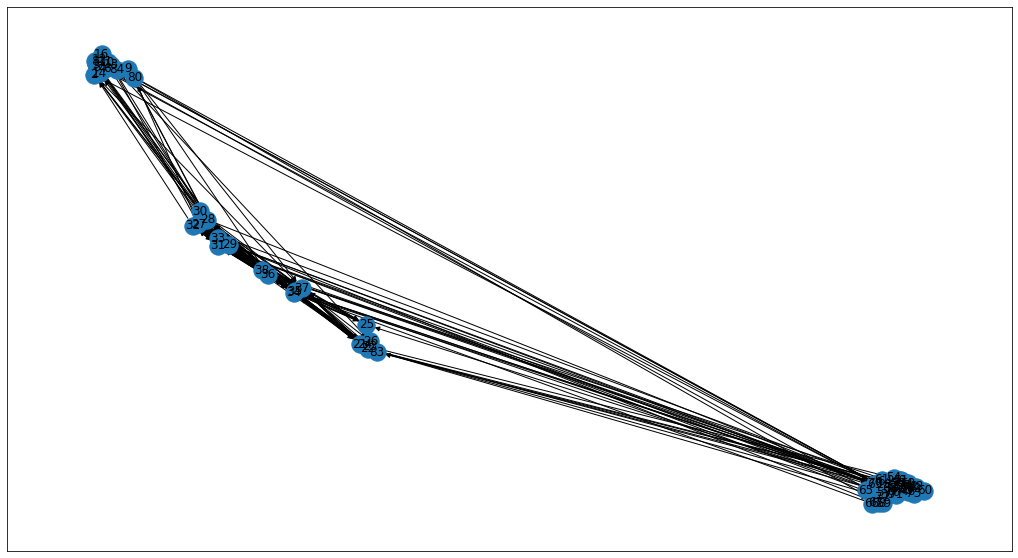

In [10]:
pos = dict()
for _, row in stations_df.iterrows():
    pos[row['id']] = [row['lat_n'], row['long_n']]

fig, ax = plt.subplots(figsize=(18,10))    
nx.draw_networkx(graph, pos, ax)

# Inspecting the duration of each trip

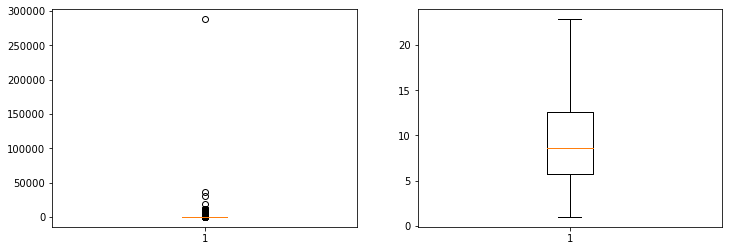

In [89]:
# duration is in seconds -> here we show it in minutes
fig, ax = plt.subplots(1,2, figsize=(12, 4))

ax[0].boxplot(trips_df['duration']/60)
ax[1] = plt.boxplot(trips_df['duration']/60, showfliers=False)

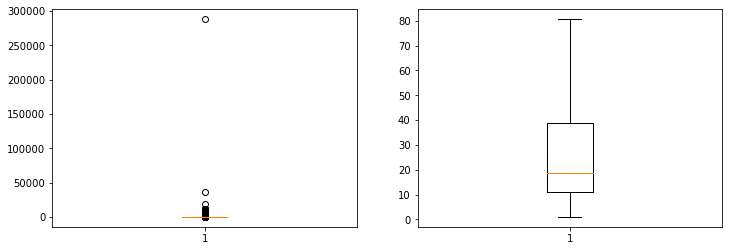

In [95]:
# Customers only
fig, ax = plt.subplots(1,2, figsize=(12, 4))

ax[0].boxplot(trips_df[trips_df['subscription_type']=='Customer']['duration']/60)
ax[1] = plt.boxplot(trips_df[trips_df['subscription_type']=='Customer']['duration']/60, showfliers=False)

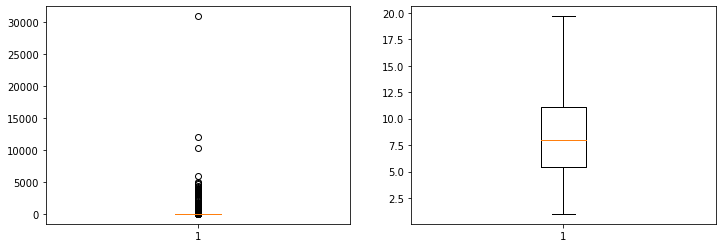

In [96]:
# Subscribers only
fig, ax = plt.subplots(1,2, figsize=(12, 4))

ax[0].boxplot(trips_df[trips_df['subscription_type']=='Subscriber']['duration']/60)
ax[1] = plt.boxplot(trips_df[trips_df['subscription_type']=='Subscriber']['duration']/60, showfliers=False)

# Building a graph to describe the trips
Each link is weigthed according to the number of trips

In [37]:
# Executed once as transformation
'''
grouped_df = trips_df.groupby(['start_station_id', 'end_station_id'])
weighted_trips_df = pd.DataFrame(columns=['start_id', 'end_id', 'weight'])
for key, group in grouped_df:
    weighted_trips_df.loc[len(weighted_trips_df.index)] = [key[0], key[1], len(group)]
    
weighted_trips_df[weighted_trips_df['weight']!=0].to_csv("../../Data/trip_graph.csv", index=False)
'''

In [56]:
weighted_trips_df

,start_id,end_id,weight
0,2,2,191
1,2,3,448
2,2,4,2200
3,2,5,627
4,2,6,1274
...,...,...,...
1746,84,13,15
1747,84,14,32
1748,84,16,5
1749,84,80,427


In [39]:
weighted_trips_df['weight'].mean()

382.61507709880067

Weights visualization

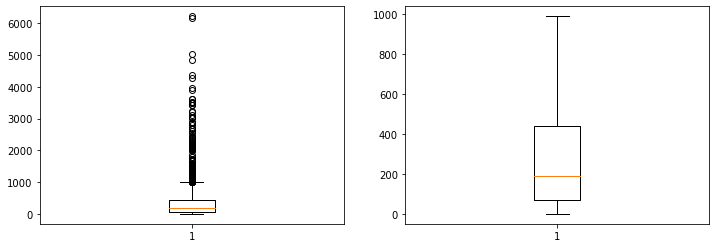

In [87]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))

ax[0].boxplot(weighted_trips_df['weight'])
ax[1] = plt.boxplot(weighted_trips_df['weight'], showfliers=False)

All users

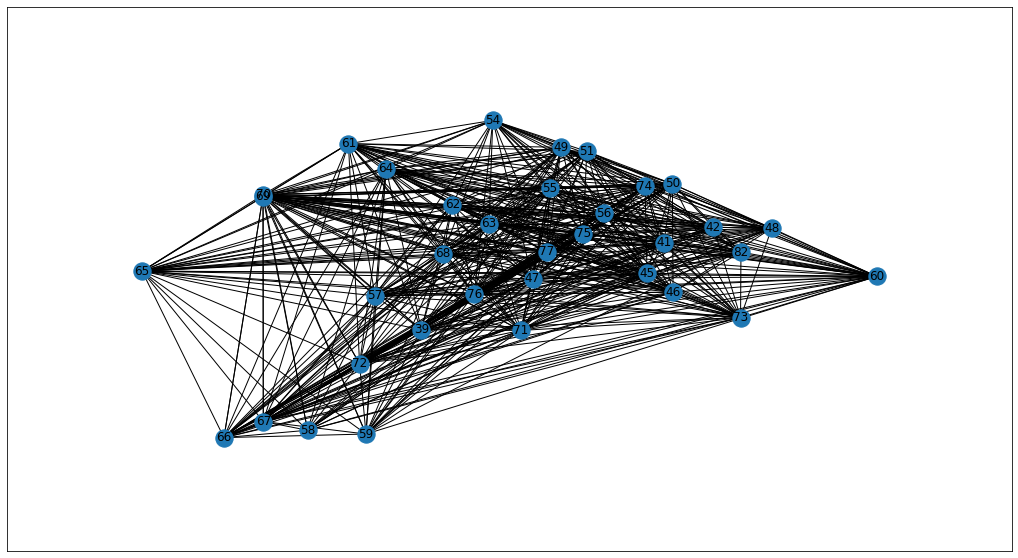

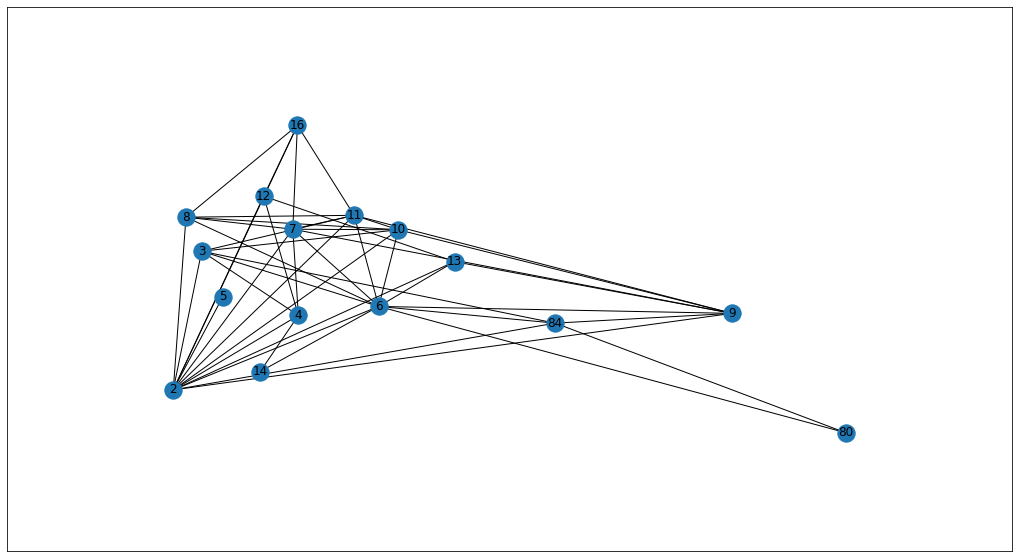

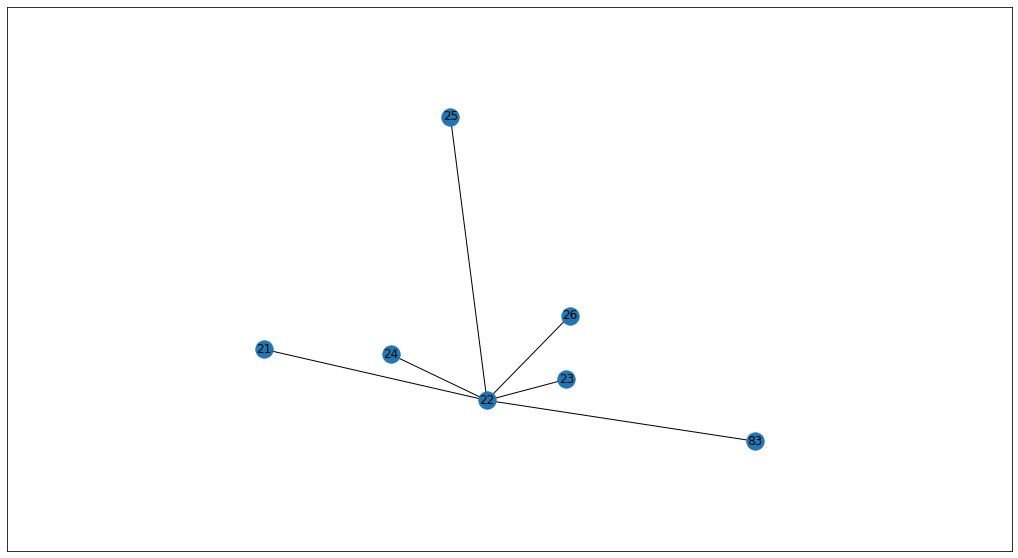

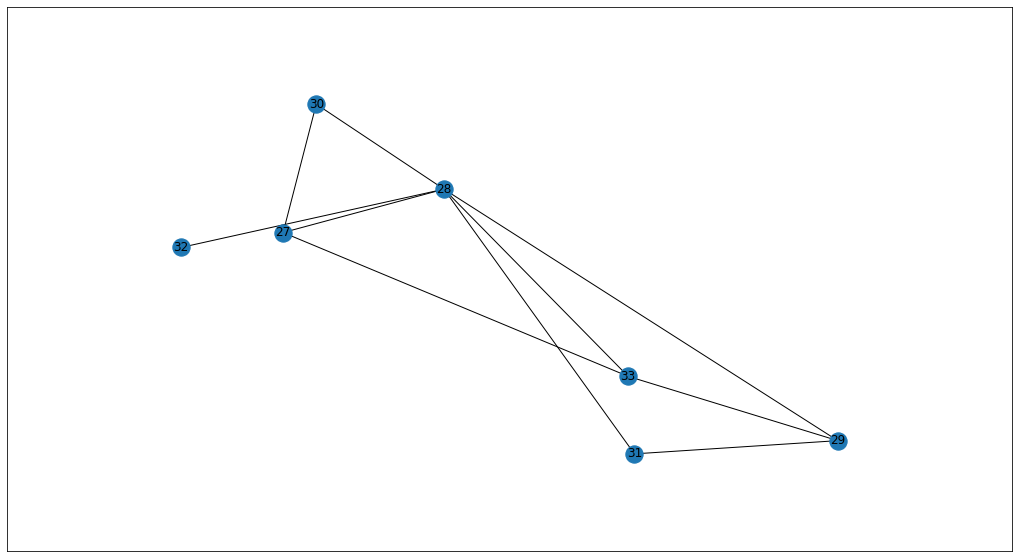

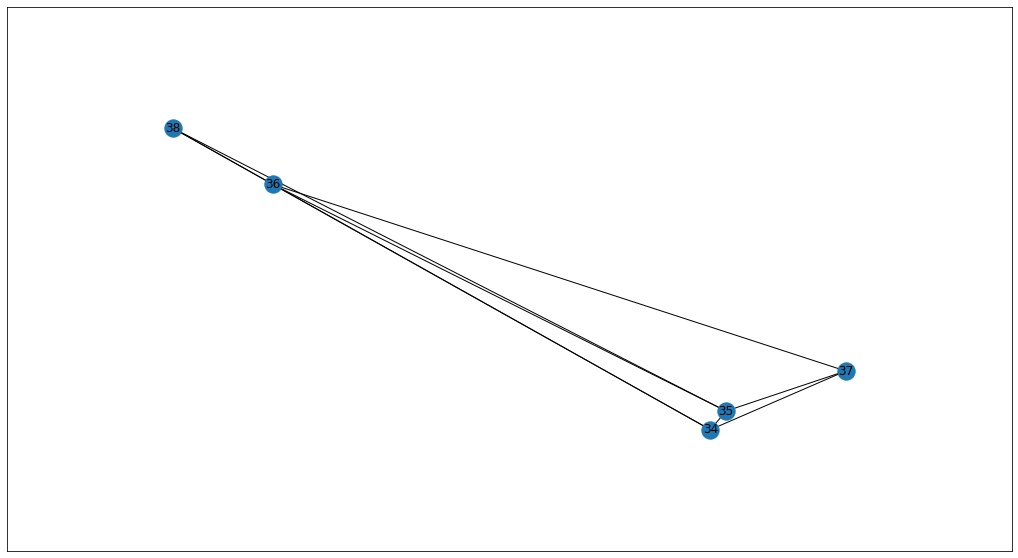

In [12]:
# undirected graphs for trips > treshold
g = nx.from_pandas_edgelist(weighted_trips_df[weighted_trips_df['weight']>100], source='start_id', 
                            target='end_id', edge_attr=True)

for c in sorted(nx.connected_components(g), key=len, reverse=True):
    fig, ax = plt.subplots(figsize=(18,10))
    nx.draw_networkx(g.subgraph(c), pos, ax)

# Save edge importance for all nodes

In [13]:
droppable_cols = ['id', 'duration', 'start_date',
       'start_station_name', 'end_date', 'end_station_name',
       'bike_id', 'subscription_type', 'zip_code']

edge_importance_df = pd.DataFrame(columns=['start_id', 'end_id', 'count'])

for n, df in trips_df.drop(droppable_cols, axis=1).groupby(['start_station_id', 'end_station_id']):
    edge_importance_df.loc[len(edge_importance_df.index)] = [n[0], n[1], len(df)]

In [36]:
edge_importance_df = edge_importance_df.sort_values(['end_id','count'], ascending=[True, False])

In [37]:
# save df: it will be used in pattern extraction
#edge_importance_df.to_csv("../../Data/edge_importance.csv", index=False )

# Print indegree, outdegree, weighted indegree and outdegree

In [73]:
# Executed once as transformation
'''
g = nx.from_pandas_edgelist(weighted_trips_df, source='start_id', target='end_id', edge_attr=True, create_using=nx.DiGraph)
degrees_df = pd.DataFrame(columns=['station', 'in_deg', 'out_deg', 'w_in', 'w_out'])
for i, j in zip(g.in_degree, g.out_degree):
    degrees_df.loc[len(degrees_df.index)] = [i[0], i[1], j[1],
          weighted_trips_df[weighted_trips_df['start_id']==i[0]]['weight'].sum(),
          weighted_trips_df[weighted_trips_df['end_id']==i[0]]['weight'].sum()]
# join to get city
degrees_df = degrees_df.join(stations_df, lsuffix='station', rsuffix='id').drop(
    ['lat', 'long', 'name', 'dock_count', 'installation_date', 'lat_n', 'long_n', 'id'], axis=1)
degrees_df.to_csv("../../Data/degrees.csv", index=False)
'''

In [78]:
degrees_df.sort_values('w_in', ascending=False)[:25]

,station,in_deg,out_deg,w_in,w_out,city
20,70,43,37,49092,63179,Mountain View
64,69,35,36,33742,35117,San Francisco
50,50,35,35,32934,33193,San Francisco
57,60,35,35,27713,30796,San Francisco
53,55,35,35,26089,23080,San Francisco
58,61,35,36,25837,28529,San Francisco
67,74,35,35,24838,25025,San Francisco
41,77,36,35,24172,28033,San Francisco
61,65,35,35,23724,26637,San Francisco
38,67,36,35,20272,17864,San Francisco


In [80]:
degrees_df.sort_values('w_in')[:25]

,station,in_deg,out_deg,w_in,w_out,city
26,24,10,11,213,277,Mountain View
23,21,10,10,224,254,Mountain View
25,23,9,10,287,350,Mountain View
28,26,7,9,311,452,Palo Alto
31,83,8,8,341,285,Palo Alto
27,25,12,11,503,517,Palo Alto
34,38,13,13,750,801,San Francisco
17,80,17,17,863,859,Redwood City
33,36,15,15,1026,1138,San Francisco
15,33,14,11,1129,1091,Redwood City


The nodes with in and out degrees >=30 have most of the trips

In [81]:
for c, group in degrees_df.groupby('city'):
    print(group.sort_values('w_in', ascending=False)[:5])
    print()

   station in_deg out_deg   w_in  w_out           city
20      70     43      37  49092  63179  Mountain View
21      76     38      37  20165  19915  Mountain View
22      31     14      14   1818   1832  Mountain View
24      22     13      16   1554   1255  Mountain View
25      23      9      10    287    350  Mountain View

   station in_deg out_deg  w_in w_out       city
29      34     15      17  2111  1819  Palo Alto
30      35     17      17  1512  1823  Palo Alto
27      25     12      11   503   517  Palo Alto
31      83      8       8   341   285  Palo Alto
28      26      7       9   311   452  Palo Alto

   station in_deg out_deg   w_in  w_out          city
19      72     38      35  14102  14339  Redwood City
68      75     35      35  12224  12027  Redwood City
14      28     16      16   6544   6719  Redwood City
18      84     16      16   1747   1441  Redwood City
16      37     17      13   1374   1210  Redwood City

   station in_deg out_deg   w_in  w_out          

# Count self loops

In [11]:
print("Self loops:\t", len(weighted_trips_df[weighted_trips_df.start_id == weighted_trips_df.end_id]))
print("Total nodes:\t", len(weighted_trips_df.start_id.unique()))

Self loops:	 70
Total nodes:	 70


# Count trips per each hour

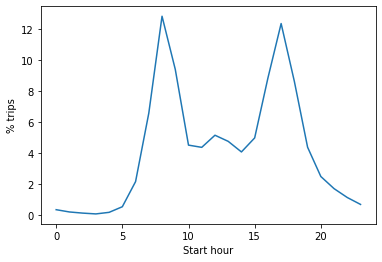

In [3]:
hourly_trips = []
for i in range(24):
    j = i+1
    if j == 24:
        j = 0
    hourly_trips.append(len(trips_df.set_index('start_date').between_time(f"{i}:00", f"{j}:00",
                                                                          include_end=False).reset_index()))
    
total = np.sum(hourly_trips)
plt.plot(range(len(hourly_trips)), hourly_trips/total*100)
plt.ylabel('% trips')
plt.xlabel('Start hour')
plt.show()

# Count the number of intervals where the number of arrived/exited bikes is above a threshold

In [77]:
thresholds = [2, 3, 5]
delta = 5 # minutes
windows = [1, 2, 4] # will be multiplied with delta to get time intervals
many_trips_count_df = pd.DataFrame()
station_kind = 'start_station_id' # start_station_id or end_station_id
date_kind = 'start_date' # start_date or end_date

many_trips_count_df['station_id'] = sorted(trips_df[station_kind].unique())

for window in windows:
    interval = window*delta # will correspond to 5, 10, 20
    for threshold in thresholds:
        counts = []
        for station_id, df in trips_df[[date_kind, station_kind]].groupby(station_kind):
            tmp = df.drop(station_kind, axis=1).resample(f"{interval}T", on = date_kind).count()
            counts.append(len(tmp[tmp[date_kind] >= threshold*window]))
        many_trips_count_df[f'count_trsh{threshold*window}_intrv{interval}'] = counts

In [47]:
# save dataframe for departures
# many_trips_count_df.to_csv("../../Results/bikes_depart.csv", index=False )

# save dataframe for arrivals
# many_trips_count_df.to_csv("../../Results/bikes_arrive.csv", index=False )

In [2]:
arrive_df = pd.read_csv("../../Results/bikes_arrive.csv")
depart_df = pd.read_csv("../../Results/bikes_depart.csv")

In [88]:
print("Total number of events in arrival:\n")
print(arrive_df.drop('station_id', axis=1).sum())
print("\nTotal number of events in departure:\n")
print(depart_df.drop('station_id', axis=1).sum())

Total number of events in arrival:

count_trsh2_intrv5      96209
count_trsh3_intrv5      22080
count_trsh5_intrv5       2936
count_trsh4_intrv10     14346
count_trsh6_intrv10      3604
count_trsh10_intrv10      531
count_trsh8_intrv20      3198
count_trsh12_intrv20      950
count_trsh20_intrv20      131
dtype: int64

Total number of events in departure:

count_trsh2_intrv5      91531
count_trsh3_intrv5      20144
count_trsh5_intrv5       3610
count_trsh4_intrv10     12937
count_trsh6_intrv10      3384
count_trsh10_intrv10      764
count_trsh8_intrv20      2786
count_trsh12_intrv20      827
count_trsh20_intrv20       48
dtype: int64


In [6]:
top_stations = {34, 50, 60, 69, 70, 72, 73, 75, 76, 82, 84}
depart_df[depart_df['station_id'].isin(top_stations)]

,station_id,count_trsh2_intrv5,count_trsh3_intrv5,count_trsh5_intrv5,count_trsh4_intrv10,count_trsh6_intrv10,count_trsh10_intrv10,count_trsh8_intrv20,count_trsh12_intrv20,count_trsh20_intrv20
27,34,170,18,1,6,2,0,0,0,0
40,50,6799,2130,284,1420,340,16,310,27,0
48,60,5095,1026,70,639,75,1,48,3,0
57,69,5778,2440,948,1739,836,260,672,272,24
58,70,9935,5115,1924,3678,1700,476,1334,501,24
60,72,1584,189,5,104,4,0,1,0,0
61,73,2267,344,6,210,10,0,6,0,0
63,75,1185,112,2,50,3,0,0,0,0
64,76,2624,366,10,155,7,0,5,0,0
67,82,1218,196,3,122,2,0,4,0,0


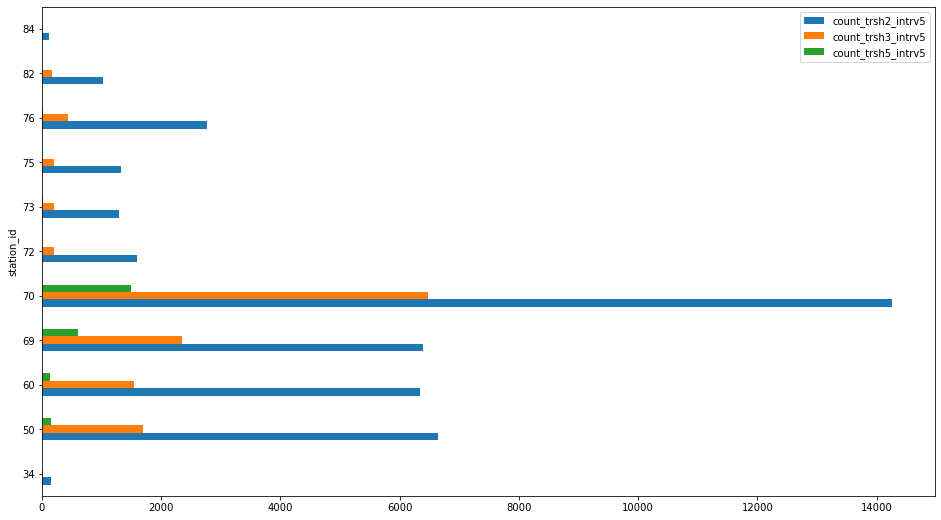

In [93]:
# plot count of some stations - ARRIVE
# intervals of 5
arrive_df[arrive_df['station_id'].isin(top_stations)][['station_id','count_trsh2_intrv5', 'count_trsh3_intrv5', 'count_trsh5_intrv5']].plot(x='station_id', kind='barh', figsize=(16, 9))

# intervals of 10
#arrive_df[arrive_df['station_id'].isin(top_stations)][['station_id','count_trsh4_intrv10', 'count_trsh6_intrv10', 'count_trsh10_intrv10']].plot(x='station_id', kind='barh', figsize=(16, 9))

# intervals of 20
#arrive_df[arrive_df['station_id'].isin(top_stations)][['station_id','count_trsh8_intrv20', 'count_trsh12_intrv20', 'count_trsh20_intrv20']].plot(x='station_id', kind='barh', figsize=(16, 9))

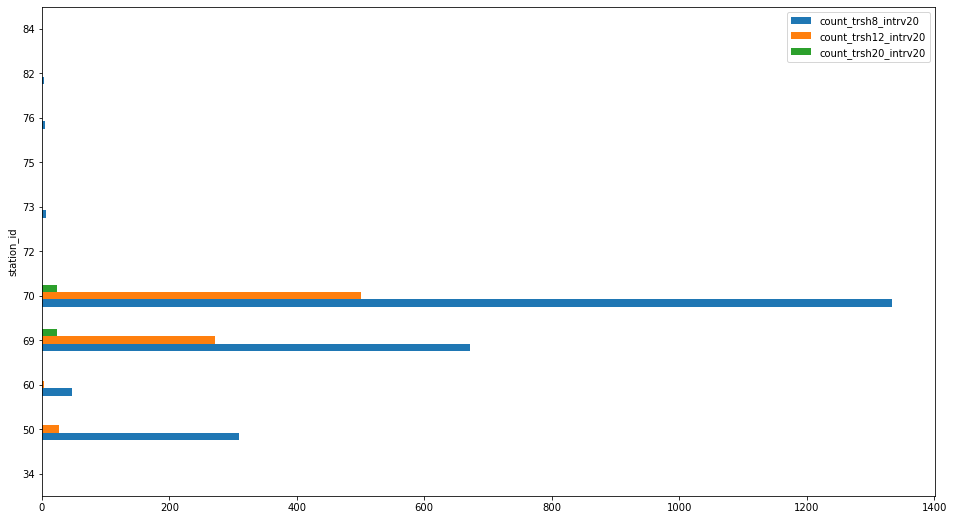

In [7]:
# plot count of some stations - DEPART

# intervals of 5
#depart_df[depart_df['station_id'].isin(top_stations)][['station_id','count_trsh2_intrv5', 'count_trsh3_intrv5', 'count_trsh5_intrv5']].plot(x='station_id', kind='barh', figsize=(16, 9))

# intervals of 10
#depart_df[depart_df['station_id'].isin(top_stations)][['station_id','count_trsh4_intrv10', 'count_trsh6_intrv10', 'count_trsh10_intrv10']].plot(x='station_id', kind='barh', figsize=(16, 9))

# intervals of 20
depart_df[depart_df['station_id'].isin(top_stations)][['station_id','count_trsh8_intrv20', 'count_trsh12_intrv20', 'count_trsh20_intrv20']].plot(x='station_id', kind='barh', figsize=(16, 9))

In [ ]:
'''
SOME CODE TO CHECK
t = df.drop('start_station_id', axis=1).resample(f"{interval}T", on = 'start_date').count()
t[t['start_date'] > 3]
t1 = df.drop('start_station_id', axis=1)
t1[t1.start_date.dt.date == datetime.datetime(2013, 10, 24).date()]
'''

In [134]:
# plot bike variations
intervals = [5, 10, 20, 60] # interval in minutes
stationIDs = [70, 34, 72, 69, 73, 84] # arbitrary set of station IDs
droppable_out_cols = ['id', 'duration', 'start_station_name', 'start_station_id', 'end_date', 'end_station_name',
                  'end_station_id', 'bike_id', 'subscription_type', 'zip_code']
droppable_in_cols = ['id', 'duration', 'start_station_name', 'start_station_id', 'start_date', 'end_station_name',
                  'end_station_id', 'bike_id', 'subscription_type', 'zip_code']


for stationID in stationIDs:
    out_bikes_df = trips_df[trips_df.start_station_id==stationID].drop(droppable_out_cols, axis=1)
    in_bikes_df = trips_df[trips_df.end_station_id==stationID].drop(droppable_in_cols, axis=1)

    for interval in intervals:
        # calculate the total number of bikes departed and in each interval
        interval_out_bikes_df = out_bikes_df.resample(f"{interval}T", on = 'start_date').count()
        interval_in_bikes_df = in_bikes_df.resample(f"{interval}T", on = 'end_date').count()
        
        interval_out_bikes_df = interval_out_bikes_df.rename(columns={'start_date':'bikes_out'})
        interval_in_bikes_df = interval_in_bikes_df.rename(columns={'end_date':'bikes_in'})
        
        # calculate the variation of the total number of bikes
        delta_df = interval_out_bikes_df.join(interval_in_bikes_df, how='outer', lsuffix='start_date', rsuffix='end_date').fillna(0)
        delta_df['bikes_out'] = -delta_df['bikes_out']
        delta_df['delta_bikes'] = delta_df['bikes_in'] + delta_df['bikes_out']
    
        delta_df.plot(y='delta_bikes', figsize=(10,6))
        if not os.path.exists(f"../../Results/Variations_trips/Station_{stationID}/"):
            os.makedirs(f"../../Results/Variations_trips/Station_{stationID}/")
        plt.savefig(f"../../Results/Variations_trips/Station_{stationID}/Interval_{interval}.jpg", bbox_inches='tight')
        plt.close()

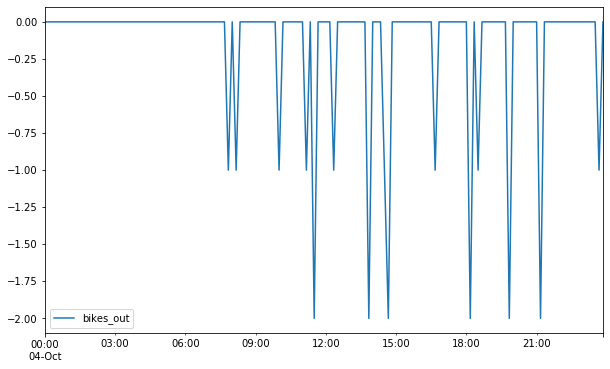

In [38]:
stationID = 70
interval = 10
droppable_out_cols = ['id', 'duration', 'start_station_name', 'start_station_id', 'end_date', 'end_station_name',
                  'end_station_id', 'bike_id', 'subscription_type', 'zip_code']
droppable_in_cols = ['id', 'duration', 'start_station_name', 'start_station_id', 'start_date', 'end_station_name',
                  'end_station_id', 'bike_id', 'subscription_type', 'zip_code']


out_bikes_df = trips_df[trips_df.start_station_id==stationID].drop(droppable_out_cols, axis=1)
in_bikes_df = trips_df[trips_df.end_station_id==stationID].drop(droppable_in_cols, axis=1)

# calculate the total number of bikes departed and arrived 
interval_out_bikes_df = out_bikes_df.resample(f"{interval}T", on = 'start_date').count()
interval_in_bikes_df = in_bikes_df.resample(f"{interval}T", on = 'end_date').count()

interval_out_bikes_df = interval_out_bikes_df.rename(columns={'start_date':'bikes_out'})
interval_in_bikes_df = interval_in_bikes_df.rename(columns={'end_date':'bikes_in'})

# calculate the variation of the total number of bikes
delta_df = interval_out_bikes_df.join(interval_in_bikes_df, how='outer', lsuffix='start_date', rsuffix='end_date').fillna(0)
delta_df['bikes_out'] = -delta_df['bikes_out']
delta_df['delta_bikes'] = delta_df['bikes_in'] + delta_df['bikes_out']
delta_df['sum_delta'] = np.cumsum(delta_df.delta_bikes)

delta_df.loc['2014-10-04'].plot(y='bikes_out',figsize=(10,6))

# Analysing consistency of trips and status

In [38]:
stationID = 70
interval = 5
droppable_out_cols = ['id', 'duration', 'start_station_name', 'start_station_id', 'end_date', 'end_station_name',
                  'end_station_id', 'bike_id', 'subscription_type', 'zip_code']
droppable_in_cols = ['id', 'duration', 'start_station_name', 'start_station_id', 'start_date', 'end_station_name',
                  'end_station_id', 'bike_id', 'subscription_type', 'zip_code']


out_bikes_df = trips_df[trips_df.start_station_id==stationID].drop(droppable_out_cols, axis=1)
in_bikes_df = trips_df[trips_df.end_station_id==stationID].drop(droppable_in_cols, axis=1)

# calculate the total number of bikes departed and arrived 
interval_out_bikes_df = out_bikes_df.resample(f"{interval}T", on = 'start_date').count()
interval_in_bikes_df = in_bikes_df.resample(f"{interval}T", on = 'end_date').count()

interval_out_bikes_df = interval_out_bikes_df.rename(columns={'start_date':'bikes_out'})
interval_in_bikes_df = interval_in_bikes_df.rename(columns={'end_date':'bikes_in'})

# calculate the variation of the total number of bikes
delta_df = interval_out_bikes_df.join(interval_in_bikes_df, how='outer', lsuffix='start_date', rsuffix='end_date').fillna(0)
delta_df['bikes_out'] = -delta_df['bikes_out']
delta_df['delta_bikes'] = delta_df['bikes_in'] + delta_df['bikes_out']

# get stationID's status
station_status_df = status_df[status_df['station_id']==stationID]\
.drop(['station_id', 'docks_available'], axis=1).resample(f"{interval}T").mean()

# join the datasets where both have a measurement
both_status_df = station_status_df.join(delta_df, how='inner')

# get how the status should be according to trips_df
offset = both_status_df['bikes_available'][0]
both_status_df['trips_bikes_available'] = np.cumsum(both_status_df['delta_bikes']).shift(1) + offset
both_status_df['trips_bikes_available'][0] = both_status_df['bikes_available'][0] # adjust 1st value

# get how the status should be according to trips_df with reset at 01:00

delta_cumsum = both_status_df['bikes_available'][0]
bikes_value = np.zeros(len(both_status_df))

for i, tup in enumerate(both_status_df.iterrows()): # tup = (index, row)
    bikes_value[i] = delta_cumsum
    delta_cumsum += tup[1]['delta_bikes']
    
    # reset at midnight
    if tup[0].hour == 0 and tup[0].minute == 0:
        delta_cumsum = tup[1]['bikes_available']

bikes_value = pd.Series(data=bikes_value, index=both_status_df.index)

both_status_df['trips_bikes_available_reset'] = bikes_value

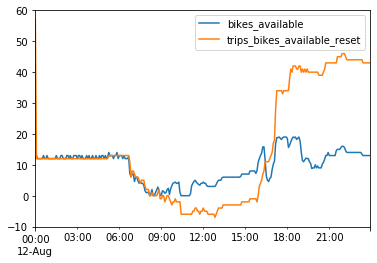

In [66]:
both_status_df[['bikes_available', 'trips_bikes_available_reset']].loc['2015-08-12'].plot()

In [61]:
both_status_df.drop('trips_bikes_available', axis=1).loc['2015-08-11 16':'2015-08-11 17']

,bikes_available,bikes_out,bikes_in,delta_bikes,trips_bikes_available_reset
2015-08-11 16:00:00,13.0,-0.0,3.0,3.0,8.0
2015-08-11 16:05:00,13.4,-0.0,2.0,2.0,11.0
2015-08-11 16:10:00,9.0,-0.0,0.0,0.0,13.0
2015-08-11 16:15:00,5.0,-0.0,3.0,3.0,13.0
2015-08-11 16:20:00,8.4,-0.0,2.0,2.0,16.0
2015-08-11 16:25:00,10.4,-0.0,4.0,4.0,18.0
2015-08-11 16:30:00,13.8,-0.0,1.0,1.0,22.0
2015-08-11 16:35:00,14.0,-0.0,0.0,0.0,23.0
2015-08-11 16:40:00,14.0,-2.0,2.0,0.0,23.0
2015-08-11 16:45:00,15.2,-0.0,4.0,4.0,23.0
